# Demonstration notebook for the NHITS Project
## Import

In [1]:
# Import librairies
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the scripts
from src.model.NHITS_model import NHITS
from data.utils import create_rolling_windows, split_data
from src.training.training import train_model
from src.evaluation import evaluate_model
from data.data_preparation import prepare_data
import src.training.config as config

## Load config parameters

In [2]:
# Current parameters
current_config = config.HYPERPARAMETERS
print("Current config :")
for key, value in current_config.items():
    print(f"{key}: {value}")

Current config :
horizon: 96
m: 5
input_size: 480
output_size: 24
batch_size: 256
hidden_size: 512
stacks: 3
blocks_per_stack: 1
pooling_kernel_sizes: [8, 4, 1]
expressiveness_ratios: [168, 24, 1]
learning_rate: 0.001
learning_rate_decay: 0.5
training_steps: 1000


## Modification of the parameters (optional)

In [3]:
# Example to change parameters directly inside the notebook
config.HYPERPARAMETERS['horizon'] = 192  # Modify horizon size 
config.HYPERPARAMETERS['pooling_kernel_size'] = [2, 2, 2]  # Modify pooling kernel size 
config.HYPERPARAMETERS['expressiveness_ratios'] = [8, 4, 1] # Modify expressiveness ratios

print("\nNew configuration :")
for key, value in config.HYPERPARAMETERS.items():
    print(f"{key}: {value}")


New configuration :
horizon: 192
m: 5
input_size: 480
output_size: 24
batch_size: 256
hidden_size: 512
stacks: 3
blocks_per_stack: 1
pooling_kernel_sizes: [8, 4, 1]
expressiveness_ratios: [8, 4, 1]
learning_rate: 0.001
learning_rate_decay: 0.5
training_steps: 1000
pooling_kernel_size: [2, 2, 2]


## Check and update the dataset's path

In [4]:
# Print the current path defined in config 
print(f"Current dataset path: {config.DATASET_PATH}")

# Ask user to enter a new path
new_path = input("Enter a new path for the dataset of your choice (or press enter to keep the current path):").strip()

# Check if the new path is valid
if new_path:  
    if os.path.exists(new_path):
        config.DATASET_PATH = new_path
        print(f"Updated path: {config.DATASET_PATH}")
    else:
        raise FileNotFoundError(f"The specified path is invalid: {new_path}")
else:
    print("The default path is kept.")

Current dataset path: data/all_six_dataset/ETTm2.csv


Enter a new path for the dataset of your choice (or press enter to keep the current path): 


The default path is kept.


## Load the Dataset

In [5]:
# Load dataset
dataset_path = config.DATASET_PATH
try:
    dataset = pd.read_csv(dataset_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Unable to load the dataset from: {dataset_path}")

# Check columns
if pd.to_datetime(dataset.iloc[:, 0], errors='coerce').notnull().all():
    dataset = dataset.drop(dataset.columns[0], axis=1)

print("\nColumns of the dataset:", dataset.columns)


Columns of the dataset: Index(['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'], dtype='object')


## Run the model


Processing column: HUFL
Step 189/1000, Train Loss: 0.1805, Validation Loss: 0.1865
Step 378/1000, Train Loss: 0.1233, Validation Loss: 0.1825
Step 567/1000, Train Loss: 0.1096, Validation Loss: 0.1740
Step 756/1000, Train Loss: 0.1014, Validation Loss: 0.1788
Step 945/1000, Train Loss: 0.0937, Validation Loss: 0.1749
Step 1000/1000, Train Loss: 0.0263, Validation Loss: 0.1811
Horizon: 192 | Average MSE: 3.4678 | Average MAE: 6.6063


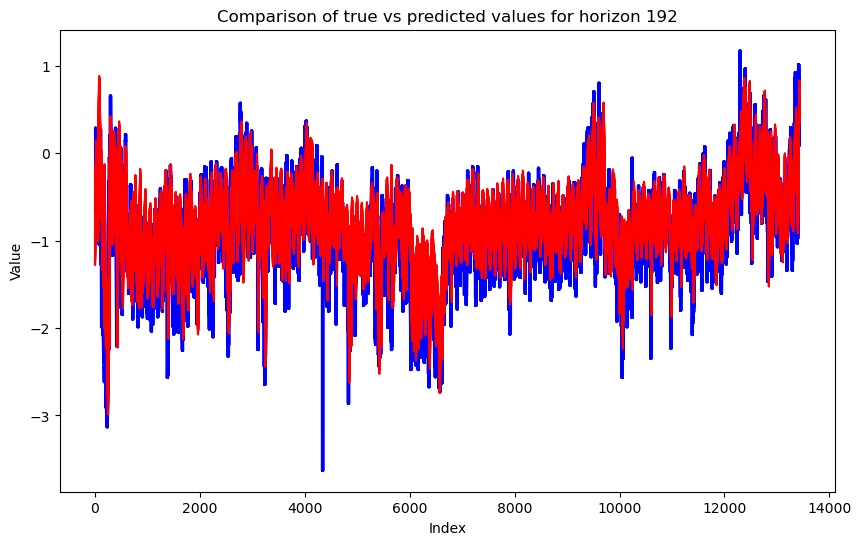


Processing column: HULL
Step 189/1000, Train Loss: 0.1324, Validation Loss: 0.1477
Step 378/1000, Train Loss: 0.0879, Validation Loss: 0.1273
Step 567/1000, Train Loss: 0.0786, Validation Loss: 0.1243
Step 756/1000, Train Loss: 0.0737, Validation Loss: 0.1203
Step 945/1000, Train Loss: 0.0702, Validation Loss: 0.1345
Step 1000/1000, Train Loss: 0.0188, Validation Loss: 0.1211
Horizon: 192 | Average MSE: 2.9869 | Average MAE: 5.9824


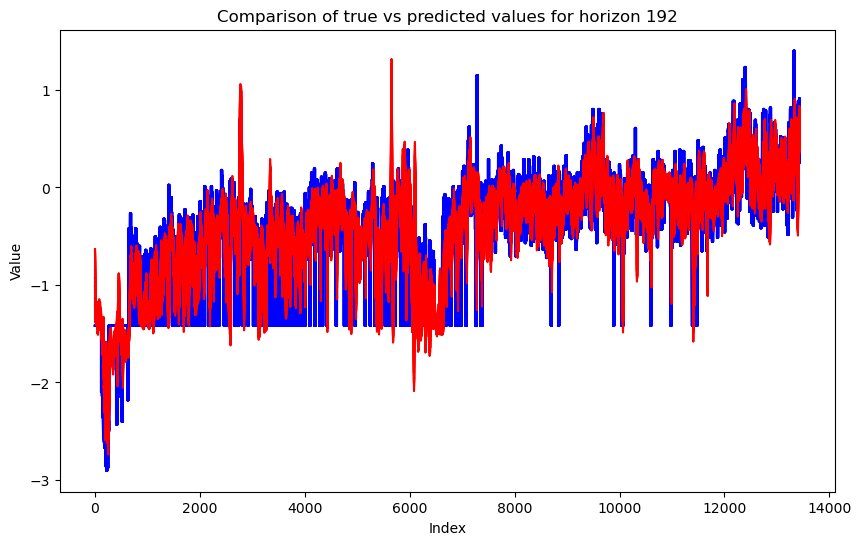


Processing column: MUFL
Step 189/1000, Train Loss: 0.1063, Validation Loss: 0.1041
Step 378/1000, Train Loss: 0.0621, Validation Loss: 0.0975
Step 567/1000, Train Loss: 0.0513, Validation Loss: 0.0966
Step 756/1000, Train Loss: 0.0464, Validation Loss: 0.0983
Step 945/1000, Train Loss: 0.0438, Validation Loss: 0.0982
Step 1000/1000, Train Loss: 0.0120, Validation Loss: 0.1020
Horizon: 192 | Average MSE: 1.6592 | Average MAE: 4.4308


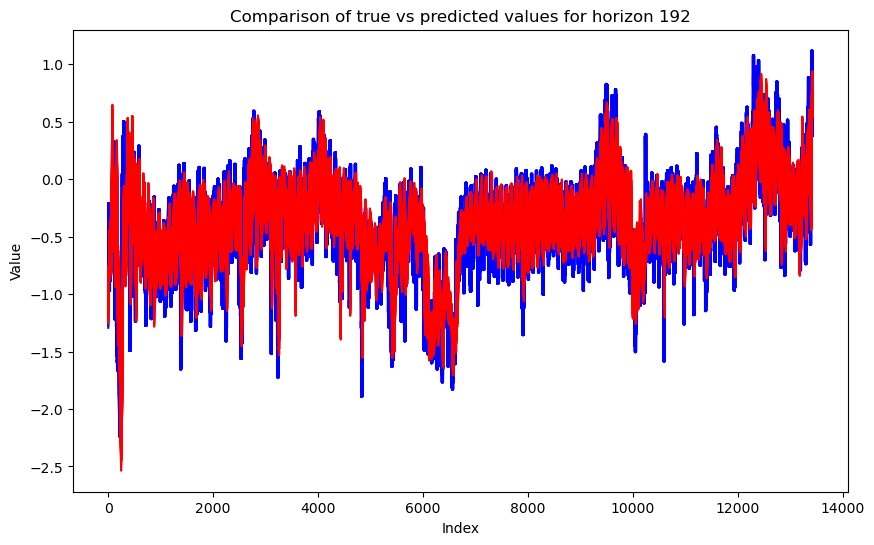


Processing column: MULL
Step 189/1000, Train Loss: 0.1438, Validation Loss: 0.1326
Step 378/1000, Train Loss: 0.1009, Validation Loss: 0.1318
Step 567/1000, Train Loss: 0.0906, Validation Loss: 0.1413
Step 756/1000, Train Loss: 0.0844, Validation Loss: 0.1296
Step 945/1000, Train Loss: 0.0814, Validation Loss: 0.1379
Step 1000/1000, Train Loss: 0.0224, Validation Loss: 0.1425
Horizon: 192 | Average MSE: 2.3353 | Average MAE: 5.4576


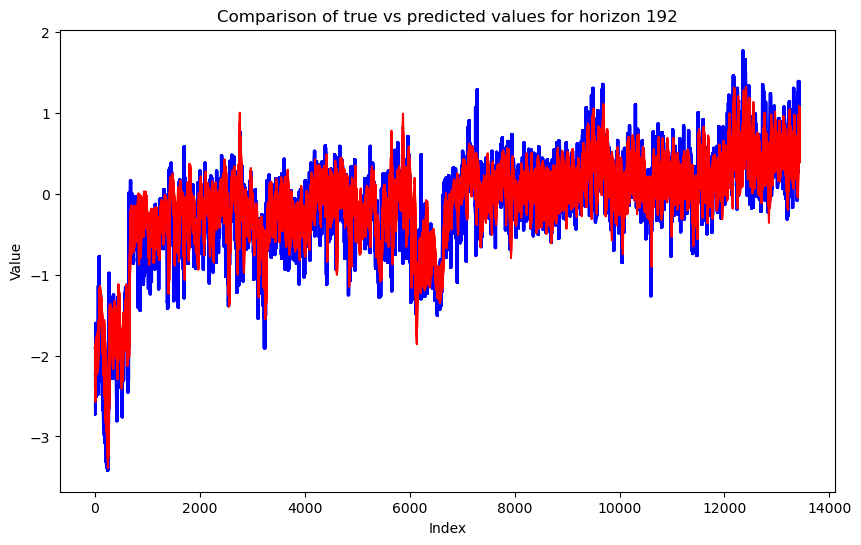


Processing column: LUFL
Step 189/1000, Train Loss: 0.0645, Validation Loss: 0.0474
Step 378/1000, Train Loss: 0.0358, Validation Loss: 0.0452
Step 567/1000, Train Loss: 0.0314, Validation Loss: 0.0445
Step 756/1000, Train Loss: 0.0294, Validation Loss: 0.0437
Step 945/1000, Train Loss: 0.0278, Validation Loss: 0.0444
Step 1000/1000, Train Loss: 0.0079, Validation Loss: 0.0452
Horizon: 192 | Average MSE: 0.6800 | Average MAE: 3.1065


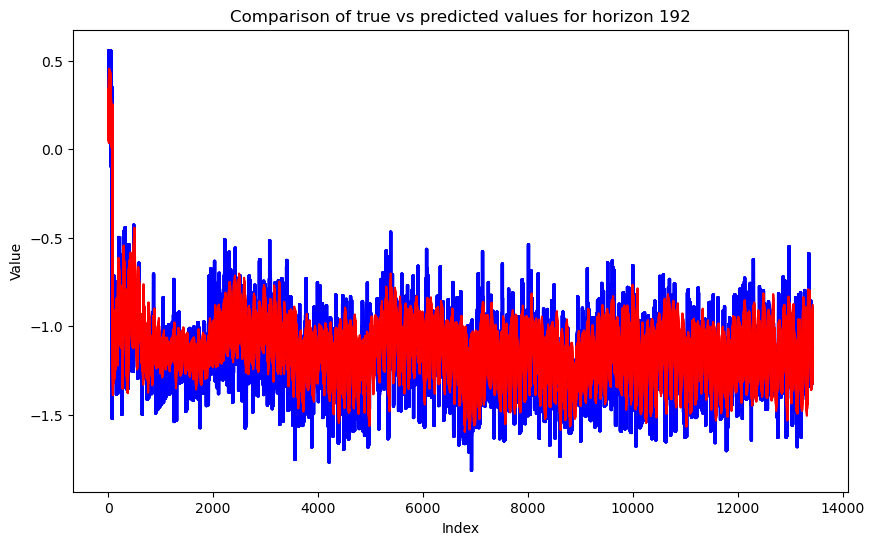


Processing column: LULL
Step 189/1000, Train Loss: 0.0747, Validation Loss: 0.0108
Step 378/1000, Train Loss: 0.0407, Validation Loss: 0.0100
Step 567/1000, Train Loss: 0.0334, Validation Loss: 0.0099
Step 756/1000, Train Loss: 0.0278, Validation Loss: 0.0097
Step 945/1000, Train Loss: 0.0276, Validation Loss: 0.0097
Step 1000/1000, Train Loss: 0.0075, Validation Loss: 0.0096
Horizon: 192 | Average MSE: 0.1893 | Average MAE: 1.5895


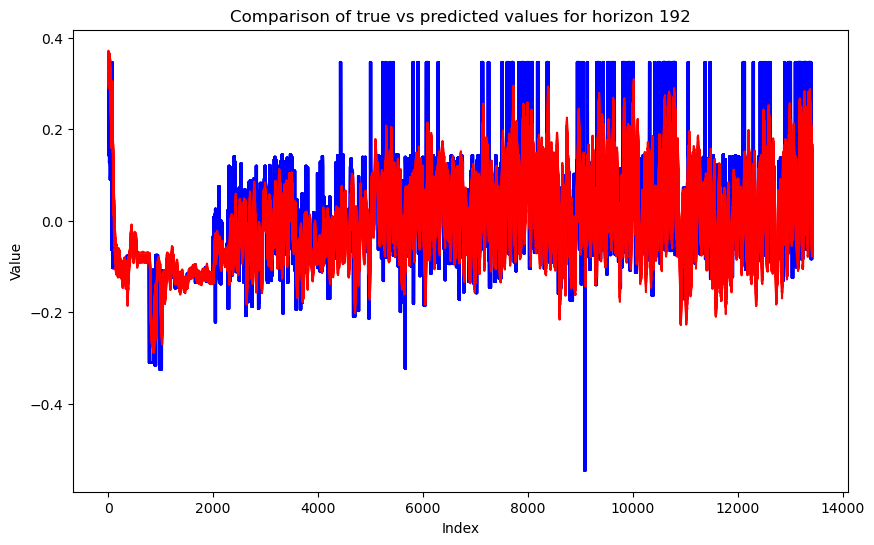


Processing column: OT
Step 189/1000, Train Loss: 0.0762, Validation Loss: 0.0417
Step 378/1000, Train Loss: 0.0357, Validation Loss: 0.0413
Step 567/1000, Train Loss: 0.0294, Validation Loss: 0.0469
Step 756/1000, Train Loss: 0.0251, Validation Loss: 0.0379
Step 945/1000, Train Loss: 0.0226, Validation Loss: 0.0331
Step 1000/1000, Train Loss: 0.0060, Validation Loss: 0.0333
Horizon: 192 | Average MSE: 0.9195 | Average MAE: 3.1624


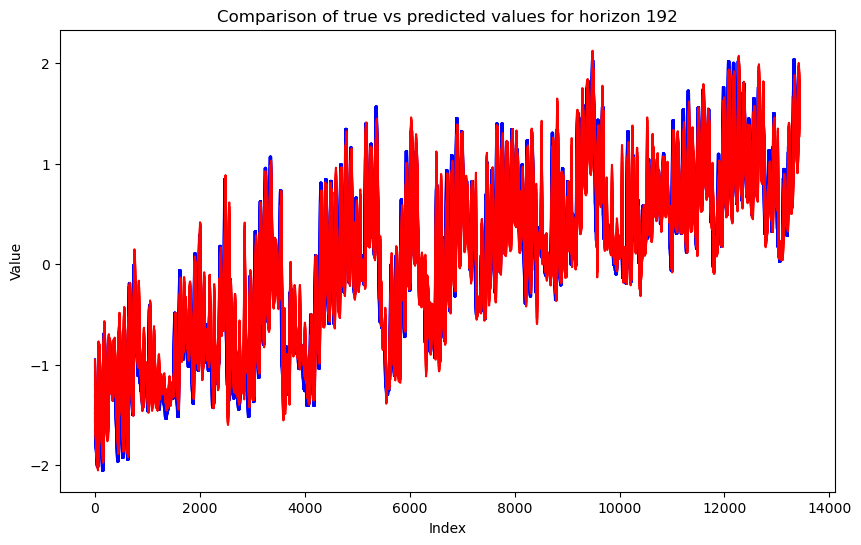

In [6]:
# Loop on the columns of the dataset
mse_list = []
mae_list = []

for column_name in dataset.columns:
    print(f"\nProcessing column: {column_name}")
    data = dataset[column_name]

    # Data preparation
    train_loader, val_loader, test_loader = prepare_data(
        data,
        config.HYPERPARAMETERS['input_size'],
        config.HYPERPARAMETERS['output_size'],
        config.HYPERPARAMETERS['batch_size']
    )

    # Initialization of the model
    model = NHITS(
        input_size=config.HYPERPARAMETERS['input_size'],
        output_size=config.HYPERPARAMETERS['output_size'],
        stacks=config.HYPERPARAMETERS['stacks'],
        blocks_per_stack=config.HYPERPARAMETERS['blocks_per_stack'],
        pooling_kernel_sizes=config.HYPERPARAMETERS['pooling_kernel_sizes'],
        hidden_size=config.HYPERPARAMETERS['hidden_size'],
        expressiveness_ratios=config.HYPERPARAMETERS['expressiveness_ratios']
    )

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.HYPERPARAMETERS['learning_rate'])
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=training_steps // 3, gamma=config.HYPERPARAMETERS['learning_rate_decay'])
    
    # Training 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_model(
        model,
        train_loader,
        val_loader,
        training_steps=config.HYPERPARAMETERS['training_steps'],
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        device=device
    )
    
    # Evaluation 
    mse, mae = evaluate_model(model, test_loader, config.HYPERPARAMETERS['horizon'], device)
    mse_list.append(mse)
    mae_list.append(mae)

## Results


Average MSE across all columns: 1.748287316375563
Average MAE across all columns: 4.333649223473602


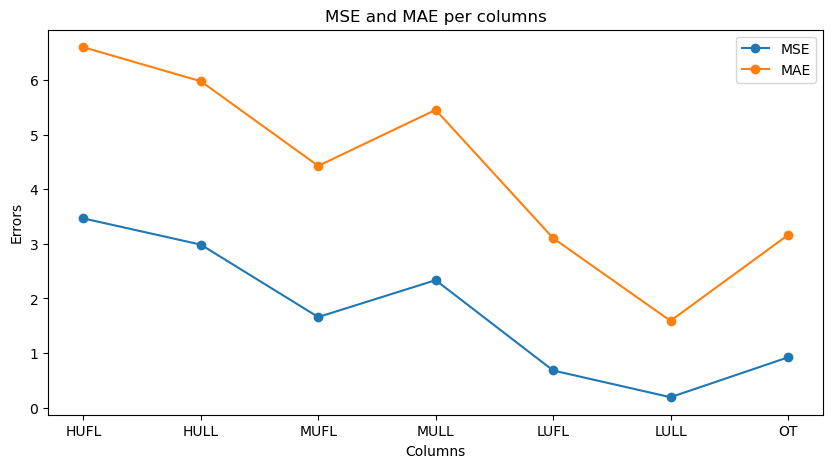

In [7]:
# Average metrics : average MSE and MAE
avg_mse = np.mean(mse_list)
avg_mae = np.mean(mae_list)

print(f"\nAverage MSE across all columns: {avg_mse}")
print(f"Average MAE across all columns: {avg_mae}")

## Results
plt.figure(figsize=(10, 5))
plt.plot(dataset.columns, mse_list, label="MSE", marker="o")
plt.plot(dataset.columns, mae_list, label="MAE", marker="o")
plt.title("MSE and MAE per columns")
plt.xlabel("Columns")
plt.ylabel("Errors")
plt.legend()
plt.show()